# Two domain inhibitory network from paper

In [1]:
import numpy as np
import matplotlib
# matplotlib.use('tkagg')
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import *
from math import isclose
import random

In [3]:
1e-13 * 6.023 * 1e23 * 1e-6

60229.99999999999

In [40]:
(50/.76)*1e3

65789.47368421052

In [12]:
copynumber(0.4, V, True)

12046.0

In [2]:
def copynumber(conc, volume, um = True):
    if um == True:
        volume = volume/1e15
        conc = conc/1e6
        
        moles = conc * volume
        copies = moles * 6.023e23
        
        return copies
    elif um == False:
        volume = volume/1e15
        moles = conc / volume
        rate = moles / 6.023e23

        return rate


In [3]:
def concentration(copy, volume, area = 65.7894,  twoD = False):

    if twoD == True:

        area = area/1e10

        copy = copy/6.023e23
        copy = copy/area
        
        return copy

    else:

        volume = volume/1e15

        copy = copy/6.023e23
        copy = copy/volume

        return copy


In [11]:
copynumber(1e6, 50, False)

3.3206043499916987e-05

In [10]:
copynumber(2.86,V,True)

86128.89999999998

In [4]:
#function to convert molar to nm^-3, or vice versa, and copy numbers 

def converter(Kd, L, molar = True):
    #convert Kd in nanomolar to nm^-3
    if molar == True:
        new_Kd = Kd/1e24 #liters to cubic nanometers
        new_Kd = new_Kd/1e9 #convert nanomoles to moles 
        new_Kd = new_Kd * (6.022*1e23) #convert moles to copies 
        copies = new_Kd * (L**3)
        return new_Kd, copies 
    elif molar == False:
        new_Kd = Kd * 1e24
        new_Kd = new_Kd/(6.022*1e23)
        new_Kd = new_Kd * 1e9
        return new_Kd 

# ODE simulation

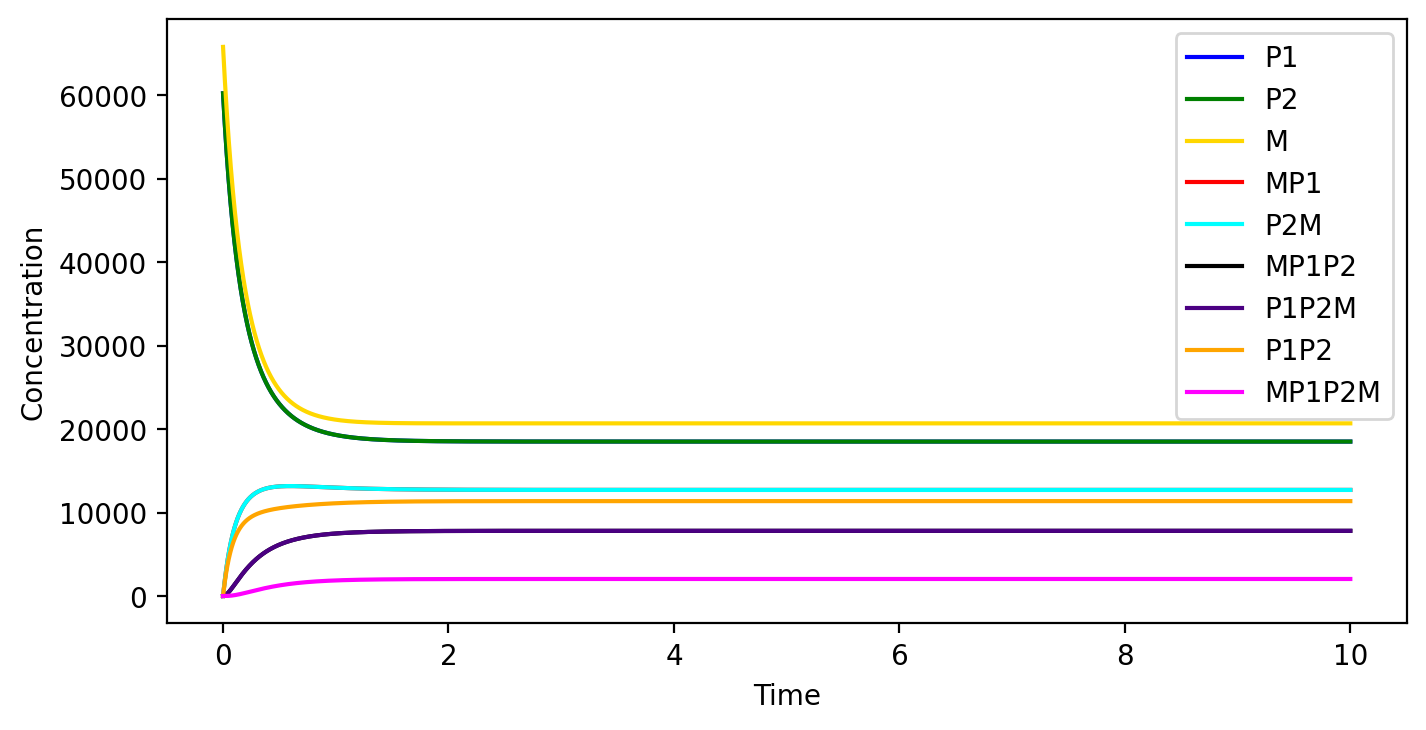

In [5]:
V = 50
VA = 0.76
A = V/VA
sigma = 1

## populations
P1 = copynumber(2,V) 
P2 = copynumber(2,V)
M = 1e3

initial_populations = [P1,P2,M*A,0,0,0,0,0,0] 

#random populations############
#initial_populations = [random.randrange(0, 100, 1) for i in range(11)]

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,10,num=10000)

# Pick rates that lead to periodicity
####################################

##params = [random.uniform(0, 1) for i in range(12)]

D3d = 50
D2d = 0.5

kppon = 1e6
kppoff = 1
    
kp1mon = 1e6
kp1moff = 1

kp2mon = kp1mon
kp2moff = kp1moff

y1 = VA/(2*sigma)
y2 = VA/(2*sigma)


params = [copynumber(kppon,V,False), kppoff, copynumber(kp1mon,V,False),kp1moff,copynumber(kp2mon,V,False),kp2moff,y1,y2]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):

    P1 = current_counts[0]
    P2 = current_counts[1]
    M = current_counts[2]
    MP1 = current_counts[3]
    P2M = current_counts[4]
    MP1P2 = current_counts[5]
    P1P2M = current_counts[6]
    P1P2 = current_counts[7]
    MP1P2M = current_counts[8]

    kppon = params[0]
    kppoff = params[1]
    
    kp1mon = params[2]
    kp1moff = params[3]

    kp2mon = params[4]
    kp2moff = params[5]

    y1 = params[6]
    y2 = params[7]
   

    dP1 = ((-kppon)*P1*P2) + (kppoff*P1P2) - (kp1mon*P1*M) + (kp1moff*MP1) - (kppon*P1*P2M) + (kppoff*P1P2M)
    dP2 = ((-kppon)*P1*P2) + (kppoff*P1P2) - (kp2mon*P2*M) + (kp2moff*P2M) - (kppon*P2*MP1) + (kppoff*MP1P2)
    dM = ((-kp1mon)*P1*M) + (kp1moff*MP1) - (kp2mon*P2*M) + (kp2moff*P2M) - (y2*kp1mon*P1P2M*M) - (y2*kp2mon*MP1P2*M) + (kp1moff*MP1P2M) + (kp2moff*MP1P2M) - (kp1mon*P1P2*M) - (kp2mon*P1P2*M) + (kp1moff*MP1P2) + (kp2moff*P1P2M)
    dMP1 = (kp1mon*P1*M) - (kp1moff*MP1) + (kppoff*MP1P2M) - (y1*kppon*MP1*P2M) - (kppon*MP1*P2) + (kppoff*MP1P2)
    dP2M = (kp2mon*P2*M) - (kp2moff*P2M) + (kppoff*MP1P2M) - (y1*kppon*MP1*P2M) - (kppon*P2M*P1) + (kppoff*P1P2M)
    dMP1P2 = (kp1mon*P1P2*M) - (kp1moff*MP1P2) + (kp2moff*MP1P2M) - (y2*kp2mon*MP1P2*M) + (kppon*MP1*P2) - (kppoff*MP1P2)
    dP1P2M = (kp2mon*P1P2*M) - (kp2moff*P1P2M) + (kp1moff*MP1P2M) - (y2*kp1mon*P1P2M*M) + (kppon*P1*P2M) - (kppoff*P1P2M)
    dP1P2 = (kppon*P1*P2) - (kppoff*P1P2) + (kp2moff*P1P2M) + (kp1moff*MP1P2) - (kp1mon*P1P2*M) - (kp2mon*P1P2*M)
    dMP1P2M = ((-kp1moff)*MP1P2M) - (kp2moff*MP1P2M) + (y2*kp1mon*P1P2M*M) + (y2*kp2mon*MP1P2*M) + (y1*kppon*MP1*P2M) - (kppoff*MP1P2M)

    return([dP1, dP2, dM, dMP1, dP2M, dMP1P2, dP1P2M, dP1P2, dMP1P2M])	

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'P1')
plt.plot(t,solutions[:,1], color="g", label = 'P2')
plt.plot(t,solutions[:,2], color="gold", label = 'M')
plt.plot(t,solutions[:,3], color="r", label = 'MP1')
plt.plot(t,solutions[:,4], color="cyan", label = 'P2M')
plt.plot(t,solutions[:,5], color="black", label = 'MP1P2')
plt.plot(t,solutions[:,6], color="indigo", label = 'P1P2M')
plt.plot(t,solutions[:,7], color="orange", label = 'P1P2')
plt.plot(t,solutions[:,8], color="magenta", label = 'MP1P2M')


plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()

plt.show()






# Theory

In [139]:
V = 50
VA = 0.76
A = V/VA
sigma = 10

y = V/(2*A*sigma)

M = 1e3*A

KaP1M = np.logspace(0, 9, 50)
KaP2M = KaP1M


##########
Keff = ((y*KaP1M*KaP2M*iM**2) + ((KaP1M + KaP2M)*iM) + 1)/((1+(KaP1M*iM))*(1+(KaP2M*iM)))



[46.79946418617053, 71.43534944212185, 109.03975020105347, 166.43918407648857, 254.0533159796969, 387.785854662129, 591.9100525974171, 903.4713445815315, 1379.00336189839, 2104.769615755776, 3212.3743519488144, 4902.541175715137, 7481.298387423503, 11414.974455945423, 17413.650232629898, 26557.578437604643, 40488.4294386373, 61698.498453793974, 93968.61950790937, 143033.19772404648, 217593.62787552085, 330866.23686091416, 502948.042868912, 764430.3419936928, 1161914.4417324197, 1766427.791317576, 2686264.995995877, 4086581.474636677, 6219293.426123553, 9468708.226424297, 14421164.518998206, 21971318.978674963, 33484368.534900554, 51043649.84022272, 77828555.72899053, 118691364.46705087, 181037685.85143828, 276170345.3685773, 421340658.6825222, 642879459.5646331, 980976288.7572699, 1496974307.5842547, 2284505271.067414, 3486485989.2492547, 5321061831.302343, 8121207128.947225, 12395171551.870245, 18918746430.070663, 28876100829.736782, 44074756215.886925]


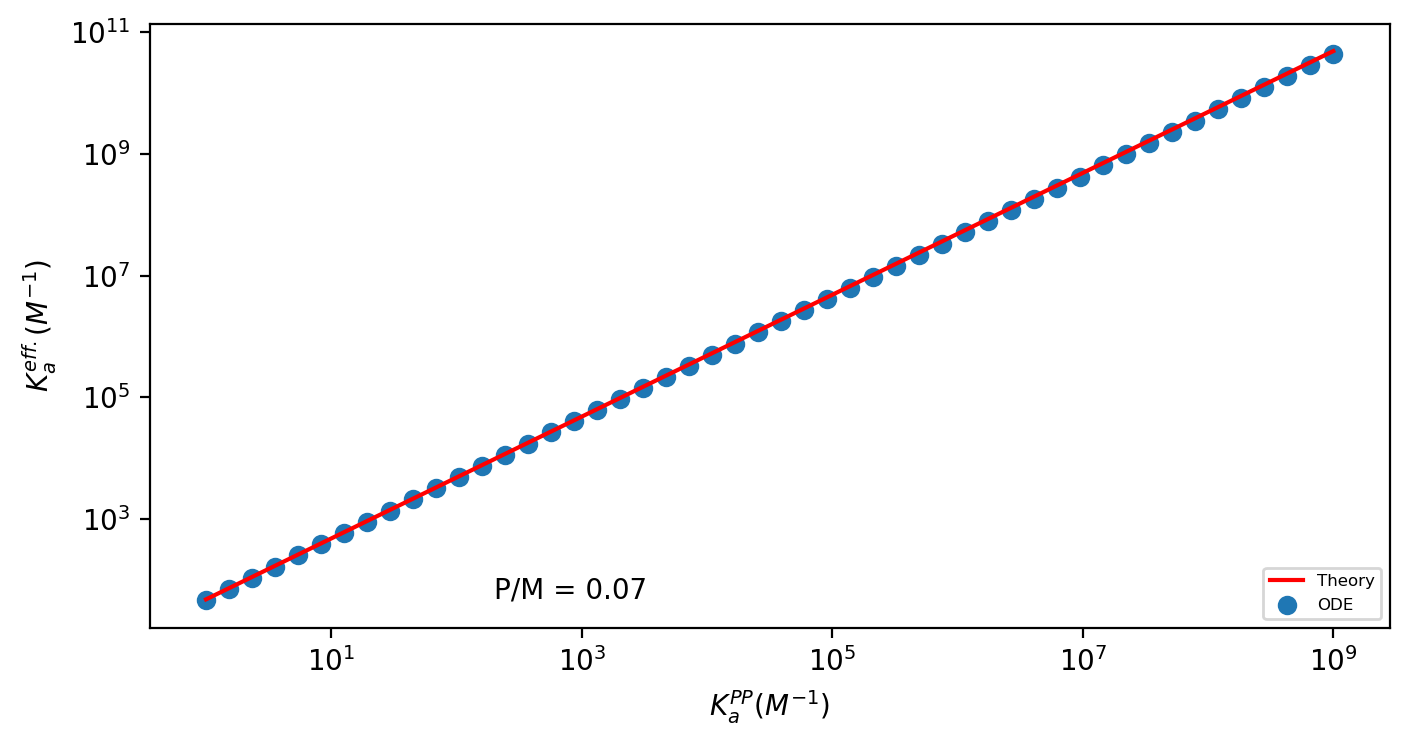

In [38]:
V = 50
VA = 0.76
A = V/VA
sigma = 1/1000

####ratio######
ratio = 0.07

## populations
iM = 2.5e4*A
iP1 = (iM*ratio)/2
iP2 = iP1


initial_populations = [iP1,iP2,iM,0,0,0,0,0,0] 

# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,100,num=10000)


##params####
KaPP = 1e6 #M^-1
KaP1M = 1e4
KaP2M = KaP1M

D3d = 50
D2d = 0.5

kppoff = 1
kppon = KaPP * kppoff #1/(M*s)

kp1moff = 1    
kp1mon = KaP1M * kp1moff

kp2moff = kp1moff
kp2mon = kp1mon

y1 = V/(2*A*sigma)
y2 = y1


ilist = []
kefflist = []

for i in np.logspace(0, 9, 50):
    ilist.append(i)

    params = [copynumber(i,V,False), kppoff, copynumber(kp1mon,V,False),kp1moff,copynumber(kp2mon,V,False),kp2moff,y1,y2]

    solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))
    P1 = concentration(solutions[:,0][-1],V)
    P2 = concentration(solutions[:,1][-1],V)
    M = concentration(solutions[:,2][-1],V)
    MP1 = concentration(solutions[:,3][-1],V)
    P2M = concentration(solutions[:,4][-1],V)
    MP1P2 = concentration(solutions[:,5][-1],V)
    P1P2M = concentration(solutions[:,6][-1],V)
    P1P2 = concentration(solutions[:,7][-1],V)
    MP1P2M = concentration(solutions[:,8][-1],V)

    Keff = (P1P2 + MP1P2 + P1P2M + MP1P2M)/((P1 + MP1)*(P2 + P2M))
    

    kefflist.append(Keff)

ratio = (iP1+iP2)/(iM)

ilist = np.array(ilist)/kppoff
#################
M = concentration(iM, V)
KaP1M = kp1mon/kp1moff
KaP2M = kp2mon/kp2moff
KaPP = np.logspace(0, 9, 50)

Keff = ((y1*KaP1M*KaP2M*M**2) + ((KaP1M + KaP2M)*M) + 1)/((1+(KaP1M*M))*(1+(KaP2M*M)))*KaPP
################

fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)

ax.scatter(ilist, kefflist, label = "ODE")
plt.plot(KaPP, Keff, color = 'red', label = "Theory")
plt.yscale("log")
plt.xscale("log")


plt.xlabel('$K^{PP}_{a}$'+'$(M^{-1})$')
plt.ylabel('$K^{eff.}_{a}$'+'$(M^{-1})$')
plt.legend(loc = 'lower right', prop={'size': 6})
plt.text(200,50, f'P/M = {ratio}', fontsize=10)
plt.savefig('figure2a.jpg')

print(kefflist)



# V/A

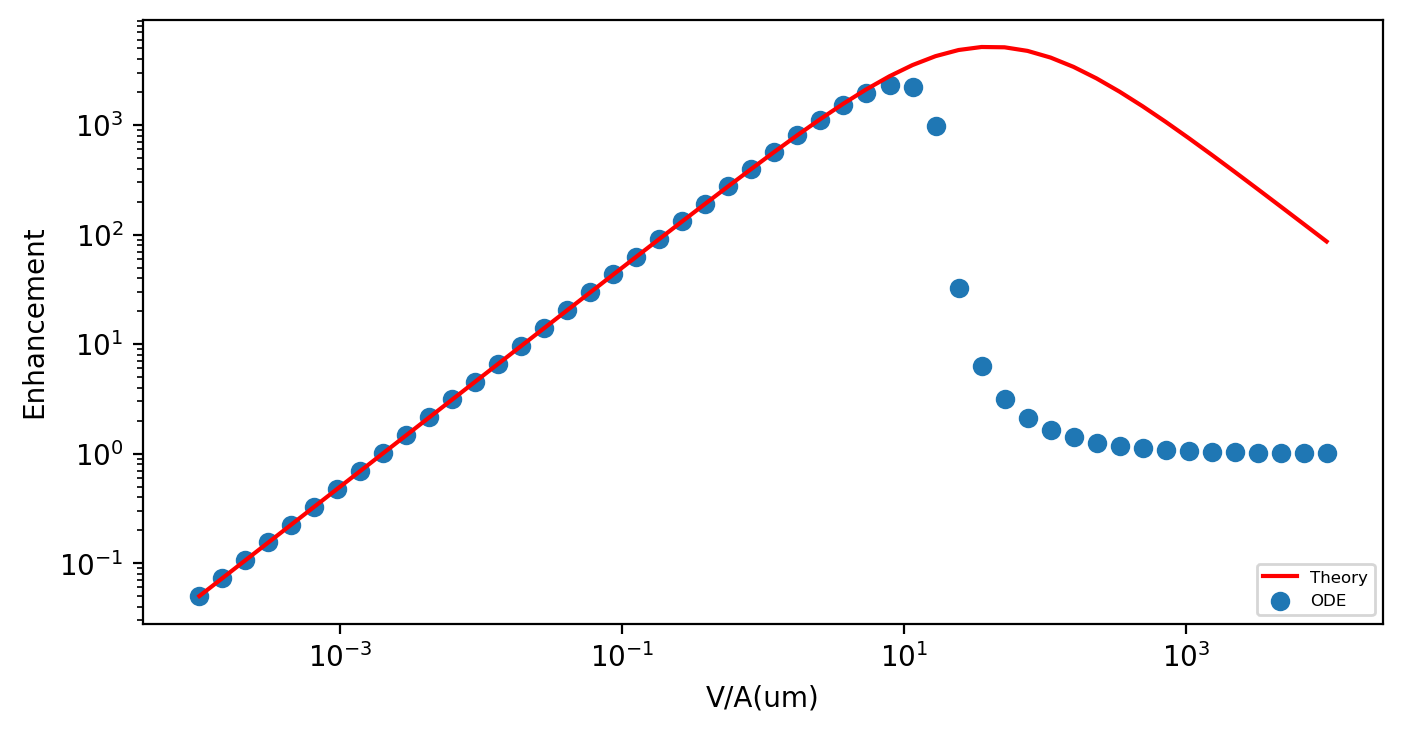

In [45]:

ilist = []
kefflist = []

for i in np.logspace(-4, 4, 50):
    
    V = 50
    
    A = V/i
    sigma = 1/1000


    ## populations
    iM = 2.5e4*A
    iP1 = 1
    iP2 = iP1


    initial_populations = [copynumber(iP1,V), copynumber(iP2,V) ,iM,0,0,0,0,0,0] 

    # Create a timeline from 0 to 50 divided into a thousand steps
    t = np.linspace(0,100,num=10000)


    ##params####
    KaPP = 1e6 #M^-1
    KaP1M = 1e6
    KaP2M = KaP1M

    D3d = 50
    D2d = 0.5

    kppoff = 1
    kppon = KaPP * kppoff #1/(M*s)

    kp1moff = 1    
    kp1mon = KaP1M * kp1moff

    kp2moff = kp1moff
    kp2mon = kp1mon

    y1 = i/(2*sigma)
    y2 = y1

    #####################
    ilist.append(i)

    params = [copynumber(kppon,V,False), kppoff, copynumber(kp1mon,V,False),kp1moff,copynumber(kp2mon,V,False),kp2moff,y1,y2]

    solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))
    P1 = concentration(solutions[:,0][-1],V)
    P2 = concentration(solutions[:,1][-1],V)
    M = concentration(solutions[:,2][-1],V)
    MP1 = concentration(solutions[:,3][-1],V)
    P2M = concentration(solutions[:,4][-1],V)
    MP1P2 = concentration(solutions[:,5][-1],V)
    P1P2M = concentration(solutions[:,6][-1],V)
    P1P2 = concentration(solutions[:,7][-1],V)
    MP1P2M = concentration(solutions[:,8][-1],V)

    Keff = (P1P2 + MP1P2 + P1P2M + MP1P2M)/((P1 + MP1)*(P2 + P2M))

    Keff = Keff/KaPP
    

    kefflist.append(Keff)

#ratio = (iP1+iP2)/(iM)

#################
V = 50

sigma = 1/1000


KaPP = 1e6 #M^-1
KaP1M = 1e6
KaP2M = KaP1M

kppoff = 1
kppon = KaPP * kppoff #1/(M*s)

kp1moff = 1    
kp1mon = KaP1M * kp1moff

kp2moff = kp1moff
kp2mon = kp1mon

VA = np.logspace(-4,4,50)
y = VA/(2*sigma)

A = V/VA
iM = 2.5e4*A


M = concentration(iM, V)


Keff = ((y*KaP1M*KaP2M*M**2) + ((KaP1M + KaP2M)*M) + 1)/((1+(KaP1M*M))*(1+(KaP2M*M)))
################

fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)

ax.scatter(ilist, kefflist, label = "ODE")
plt.plot(VA, Keff, color = 'red', label = "Theory")
plt.yscale("log")
plt.xscale("log")


plt.xlabel('V/A(um)')
plt.ylabel('Enhancement')
plt.legend(loc = 'lower right', prop={'size': 6})
#plt.text(200,50, f'P/M = {ratio}', fontsize=10)
plt.savefig('figure3a.jpg')




In [44]:
y

array([5.00000000e-02, 7.28174239e-02, 1.06047544e-01, 1.54442180e-01,
       2.24921633e-01, 3.27564278e-01, 4.77047738e-01, 6.94747747e-01,
       1.01179482e+00, 1.47352585e+00, 2.14596713e+00, 3.12527596e+00,
       4.55149089e+00, 6.62855683e+00, 9.65348864e+00, 1.40588435e+01,
       2.04745753e+01, 2.98181166e+01, 4.34255687e+01, 6.32427608e+01,
       9.21034985e+01, 1.34134790e+02, 1.95346997e+02, 2.84493301e+02,
       4.14321386e+02, 6.03396320e+02, 8.78755312e+02, 1.27977396e+03,
       1.86379686e+03, 2.71433772e+03, 3.95302161e+03, 5.75697700e+03,
       8.38416468e+03, 1.22102655e+04, 1.77824015e+04, 2.58973734e+04,
       3.77156003e+04, 5.49270571e+04, 7.99929360e+04, 1.16497591e+05,
       1.69661089e+05, 2.47085668e+05, 3.59842837e+05, 5.24056567e+05,
       7.63208984e+05, 1.11149824e+06, 1.61872877e+06, 2.35743318e+06,
       3.43324423e+06, 5.00000000e+06])